In [1]:
#Importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from itertools import combinations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Understanding the Data
___

In [2]:
#Reading the data
data = pd.read_csv("data/train_dataset.csv")
values = pd.read_csv("data/train_salaries.csv")
combined_data = pd.merge(data, values, on='jobId')

In [3]:
#Displaying the data
combined_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [4]:
#Gathering the relevant information about the dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [5]:
#Checking for null values
combined_data.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

<b>NO</b> null values found.

In [6]:
#Dropping the unnecessary columns
combined_data.drop(["jobId", "companyId"], axis = 1, inplace = True)

In [7]:
#Determining the unique values in each categorical field
for column in combined_data.columns:
    if combined_data[column].dtype == "object":
        print(column, ':', list(combined_data[column].unique()))


jobType : ['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR', 'CTO', 'SENIOR']
degree : ['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE']
major : ['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY', 'LITERATURE', 'BUSINESS', 'ENGINEERING']
industry : ['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE']


In [8]:
#Segregating the columns into categorical and numerical columns
cat_list = []
num_list = []
for column in combined_data.columns:
    if combined_data[column].dtype == 'object':
        cat_list.append(column)
    else: 
        num_list.append(column)

# Numerical fields
___

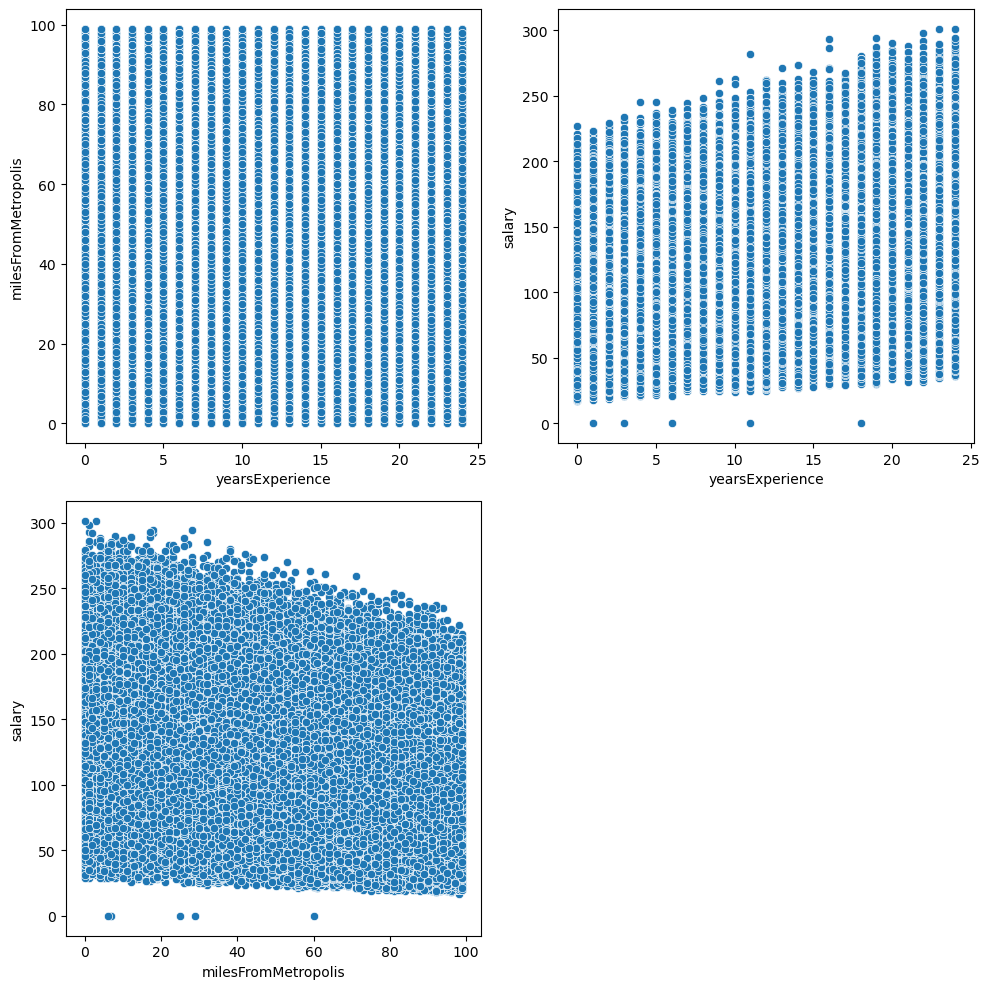

In [9]:
column_combination = combinations(combined_data[num_list], r=2)

fig, ax = plt.subplots(nrows=2, ncols= 2, figsize = (10,10))
ax = ax.flatten()
for i, (x, y) in enumerate(column_combination):
    sns.scatterplot(data=combined_data, x=x, y=y, ax=ax[i])

fig.delaxes(ax=ax[-1])
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


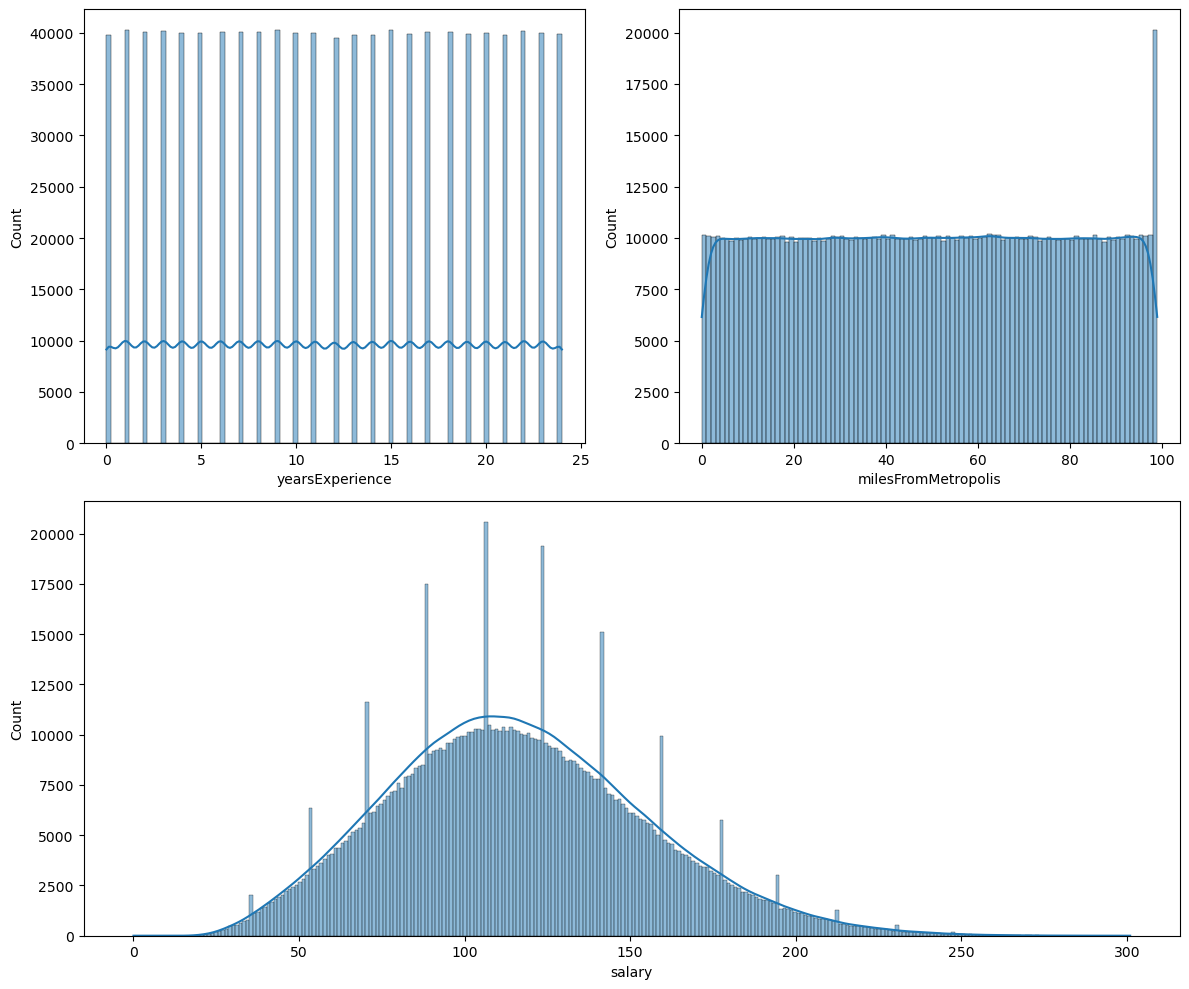

In [10]:
fig = plt.figure(figsize = (12,10))
gs = fig.add_gridspec(2, 2)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

for i, x in enumerate(num_list):
    if i == 0:
        sns.histplot(data = combined_data, x=x, ax=ax1, kde=True)
    elif i == 1:
        sns.histplot(data = combined_data, x=x, ax=ax2, kde=True)
    elif i == 2:
        sns.histplot(data = combined_data, x=x, ax=ax3, kde=True)        

plt.tight_layout()
plt.show()

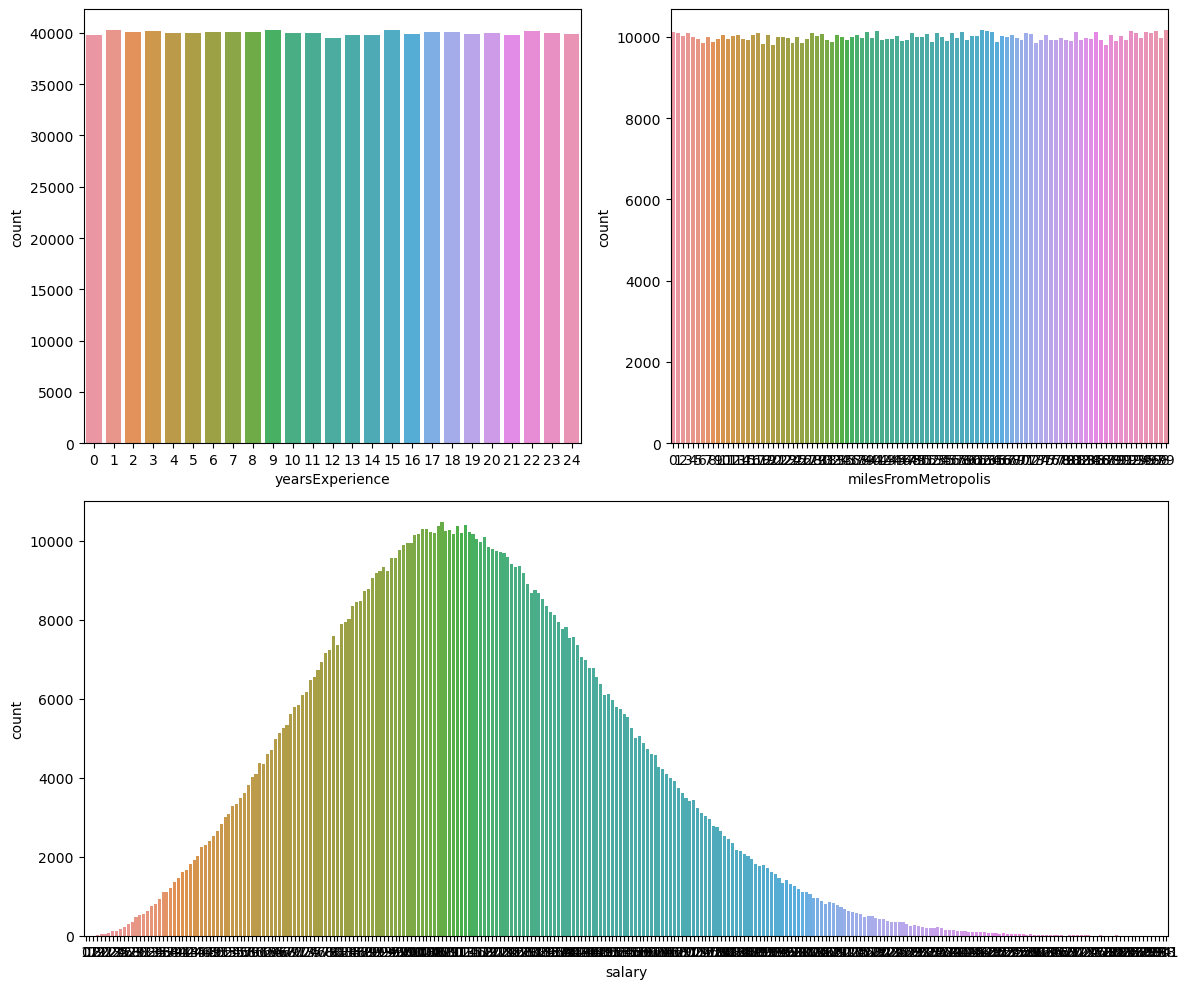

In [11]:
fig = plt.figure(figsize = (12,10))
gs = fig.add_gridspec(2, 2)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

for i, x in enumerate(num_list):
    if i == 0:
        sns.countplot(data = combined_data, x=x, ax=ax1)
    elif i == 1:
        sns.countplot(data = combined_data, x=x, ax=ax2)
    elif i == 2:
        sns.countplot(data = combined_data, x=x, ax=ax3)        

plt.tight_layout()
plt.show()

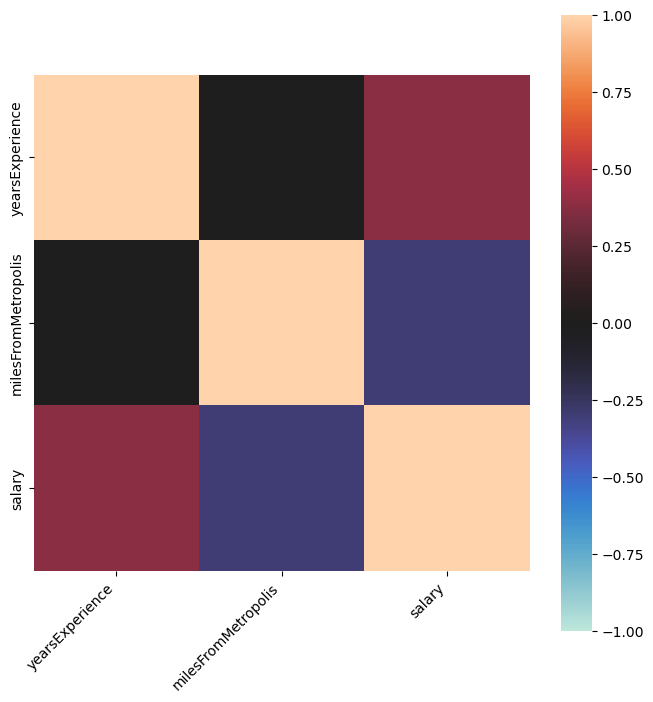

In [12]:
#Visualizing correlation matrix using seaborn's heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(
    combined_data[num_list].corr(),
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    fmt='.2f',
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [13]:
#Correlation matrix in tabular form
round(combined_data[num_list].corr(),2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.0,0.38
milesFromMetropolis,0.00,1.0,-0.30
salary,0.38,-0.3,1.00


<b>Note:</b>
- Positive correlation among `yearsExperience` and `salary`.

- Negative correlation among `milesFromMetropolis` and `salary`.

- No correlation among `milesFromMetropolis` and `yearsExperience`.

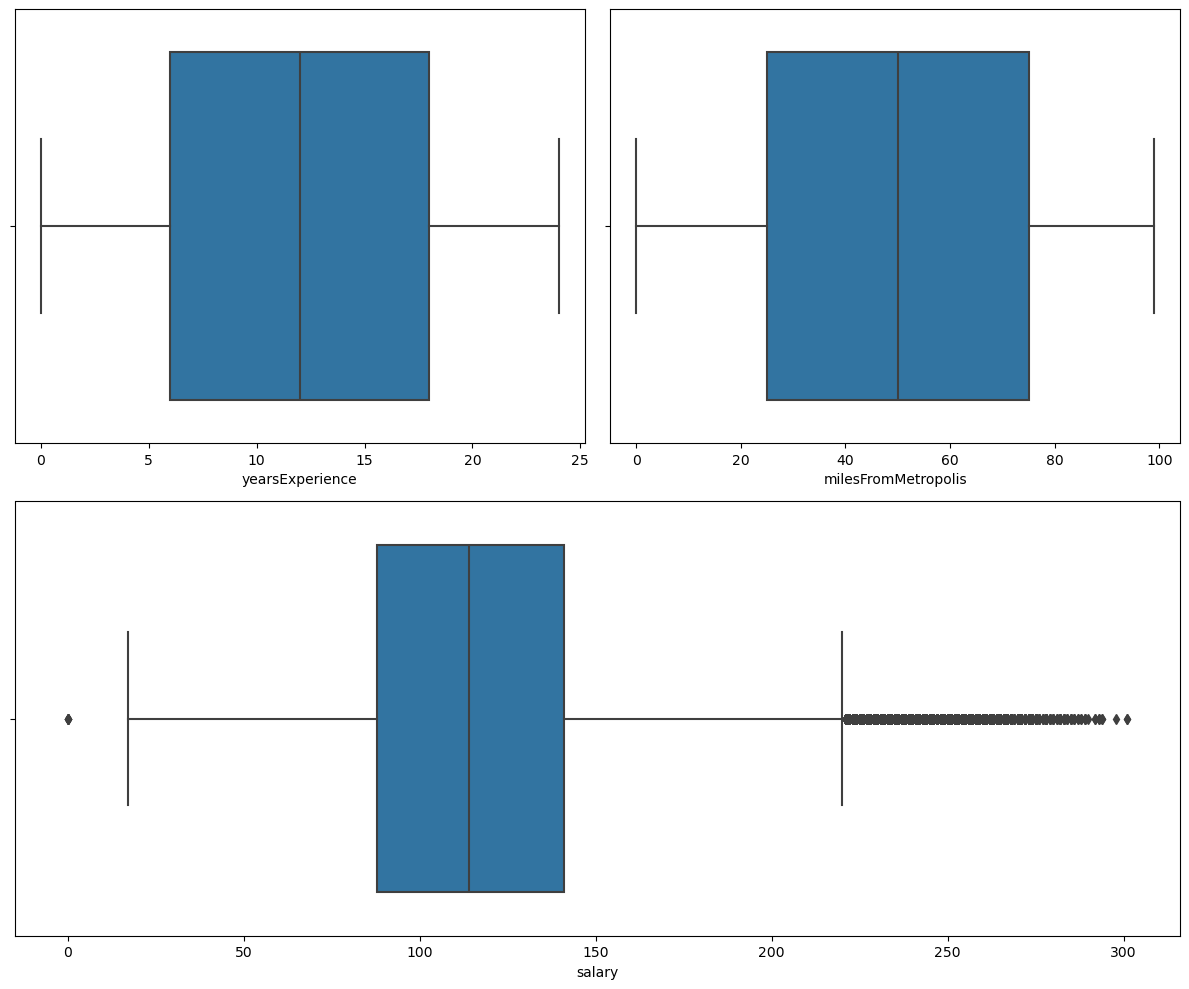

In [14]:
fig = plt.figure(figsize = (12,10))
gs = fig.add_gridspec(2, 2)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

for i, x in enumerate(num_list):
    if i == 0:
        sns.boxplot(data = combined_data, x=x, ax=ax1)
    elif i == 1:
        sns.boxplot(data = combined_data, x=x, ax=ax2)
    elif i == 2:
        sns.boxplot(data = combined_data, x=x, ax=ax3)        

plt.tight_layout()
plt.show()

<b>Note:</b> `salary` has some outliers


In [15]:
# Determining Variance Inflation Factor (VIF) in order to check for multi-colinearity among numerical features

# Subset the DataFrame to include only the numerical columns
df_numerical = combined_data[num_list]

# Add a constant column for the intercept
df_numerical = sm.add_constant(df_numerical)

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['feature'] = df_numerical.columns
vif_data['VIF'] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]

print(vif_data)

               feature        VIF
0                const  17.501268
1      yearsExperience   1.182693
2  milesFromMetropolis   1.115176
3               salary   1.297673


The VIF values indicate that there is no significant multicollinearity among the numerical features (`yearsExperience`, `milesFromMetropolis`, and `salary`) in your DataFrame. All VIF values are below 5, which is generally considered a threshold for identifying multicollinearity issues. The `const` (constant or intercept term) has a higher VIF, but this is expected and not a concern.

#### Interpretation of VIF Values:
- <b> yearsExperience (VIF = 1.182693) </b>: There is no significant multicollinearity involving this variable.
- <b> milesFromMetropolis (VIF = 1.115176) </b>: There is no significant multicollinearity involving this variable.
- <b>salary (VIF = 1.297673)</b>: There is no significant multicollinearity involving this variable.
- <b>const (VIF = 17.501268)</b>: The high VIF value for the constant term is not a concern. It just indicates that the intercept term is not well-explained by the other variables, which is normal.

# Categorical Fields
___
Here, we will try to find any type of relationship between the categorical variables. We will be checking for any type of collinearity in these independent variables.

In [16]:
#Performing Chi-square test of independence
def chi2_test(data, column1, column2):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2, p_value, dof, exp_value = chi2_contingency(contingency_table)
    sign_value = 0.05

    print("------------------------------------------------------------------------------------")
    print(f"Chi2 - test between {column1} and {column2}")
    print(f"Degree of Freedom = {dof}")
    print(f"Significance Level = {sign_value}")
    print(f"Chi-square statistic = {chi2}")
    print(f"p-value = {p_value}")
        
    if p_value<sign_value:
        print(f'Reject H0, There is a relationship between {column1} and {column2}.')
    else:
        print(f"H0 sustained, There is no relationship between {column1} and {column2}.")

In [17]:
#Making pairs of the categorical columns and then performing chi-square test in order to find any relationship between them
column_pairs = combinations(combined_data[cat_list].columns, 2)

for column1, column2 in column_pairs:
    chi2_test(combined_data[cat_list], column1, column2)

------------------------------------------------------------------------------------
Chi2 - test between jobType and degree
Degree of Freedom = 28
Significance Level = 0.05
Chi-square statistic = 158620.81447095104
p-value = 0.0
Reject H0, There is a relationship between jobType and degree.
------------------------------------------------------------------------------------
Chi2 - test between jobType and major
Degree of Freedom = 56
Significance Level = 0.05
Chi-square statistic = 125514.70618848808
p-value = 0.0
Reject H0, There is a relationship between jobType and major.
------------------------------------------------------------------------------------
Chi2 - test between jobType and industry
Degree of Freedom = 42
Significance Level = 0.05
Chi-square statistic = 47.265180908558605
p-value = 0.2662543916255588
H0 sustained, There is no relationship between jobType and industry.
------------------------------------------------------------------------------------
Chi2 - test betwee

Among Categorical variables, there is a relationship between the following columns:
1. jobType and degree
2. jobType and major
3. degree and major

## <b>Performing ANOVA</b>

In [18]:
# Perform one-way ANOVA on `jobType`
f_val, p_val = f_oneway(
    combined_data[combined_data['jobType'] == 'CFO']['salary'],
    combined_data[combined_data['jobType'] == 'CEO']['salary'],
    combined_data[combined_data['jobType'] == 'VICE_PRESIDENT']['salary'],
    combined_data[combined_data['jobType'] == 'MANAGER']['salary'],
    combined_data[combined_data['jobType'] == 'JUNIOR']['salary'],
    combined_data[combined_data['jobType'] == 'JANITOR']['salary'],
    combined_data[combined_data['jobType'] == 'CTO']['salary'],
    combined_data[combined_data['jobType'] == 'SENIOR']['salary']
)

print("F-Statistic:", f_val)
print("P-Value:", p_val)

F-Statistic: 79296.75890294109
P-Value: 0.0


In [19]:
# Perform one-way ANOVA on `degree`
f_val, p_val = f_oneway(
    combined_data[combined_data['degree'] == 'MASTERS']['salary'],
    combined_data[combined_data['degree'] == 'HIGH_SCHOOL']['salary'],
    combined_data[combined_data['degree'] == 'DOCTORAL']['salary'],
    combined_data[combined_data['degree'] == 'BACHELORS']['salary'],
    combined_data[combined_data['degree'] == 'NONE']['salary']
)

print("F-Statistic:", f_val)
print("P-Value:", p_val)

F-Statistic: 47984.20216602136
P-Value: 0.0


In [20]:
# Perform one-way ANOVA on `major`
f_val, p_val = f_oneway(
    combined_data[combined_data['major'] == 'MATH']['salary'],
    combined_data[combined_data['major'] == 'NONE']['salary'],
    combined_data[combined_data['major'] == 'PHYSICS']['salary'],
    combined_data[combined_data['major'] == 'CHEMISTRY']['salary'],
    combined_data[combined_data['major'] == 'COMPSCI']['salary'],
    combined_data[combined_data['major'] == 'BIOLOGY']['salary'],
    combined_data[combined_data['major'] == 'LITERATURE']['salary'],
    combined_data[combined_data['major'] == 'BUSINESS']['salary'],
    combined_data[combined_data['major'] == 'ENGINEERING']['salary'],
)

print("F-Statistic:", f_val)
print("P-Value:", p_val)

F-Statistic: 20922.428835180654
P-Value: 0.0


In [21]:
# Perform one-way ANOVA on `industry`
f_val, p_val = f_oneway(
    combined_data[combined_data['industry'] == 'HEALTH']['salary'],
    combined_data[combined_data['industry'] == 'WEB']['salary'],
    combined_data[combined_data['industry'] == 'AUTO']['salary'],
    combined_data[combined_data['industry'] == 'FINANCE']['salary'],
    combined_data[combined_data['industry'] == 'EDUCATION']['salary'],
    combined_data[combined_data['industry'] == 'OIL']['salary'],
    combined_data[combined_data['industry'] == 'SERVICE']['salary']
)

print("F-Statistic:", f_val)
print("P-Value:", p_val)

F-Statistic: 16077.64261880988
P-Value: 0.0


#### <b>Note:</b>
Since p-value of each categorical feature is zero, we can reject the null hypothesis that the mean salary of each group in these features is the same. 
Therefore, there is a significant difference in the mean salary of each of these groups in the categorical features. In other words, these features definitely have certain impact on the salary of the employee. 

In [22]:

# Perform Tukey's HSD test for each categorical variable
for column in ['jobType', 'degree', 'major', 'industry']:
    tukey = pairwise_tukeyhsd(endog=combined_data['salary'], groups=combined_data[column], alpha=0.05)
    print(f"Tukey's HSD results for {column}:\n", tukey, "\n")


Tukey's HSD results for jobType:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1     group2     meandiff p-adj  lower    upper   reject
--------------------------------------------------------------
    CEO            CFO  -9.8529   0.0 -10.2299  -9.4758   True
    CEO            CTO  -9.8314   0.0  -10.208  -9.4549   True
    CEO        JANITOR -74.4984   0.0  -74.875 -74.1218   True
    CEO         JUNIOR -49.9799   0.0 -50.3568  -49.603   True
    CEO        MANAGER -29.9438   0.0 -30.3203 -29.5673   True
    CEO         SENIOR -39.8237   0.0 -40.1996 -39.4477   True
    CEO VICE_PRESIDENT -19.9438   0.0 -20.3202 -19.5674   True
    CFO            CTO   0.0214   1.0  -0.3554   0.3983  False
    CFO        JANITOR -64.6455   0.0 -65.0224 -64.2686   True
    CFO         JUNIOR  -40.127   0.0 -40.5042 -39.7498   True
    CFO        MANAGER  -20.091   0.0 -20.4678 -19.7142   True
    CFO         SENIOR -29.9708   0.0  -30.347 -29.5945   True
    CFO VICE_PRESIDEN

## <b>Visualizing the impact</b>

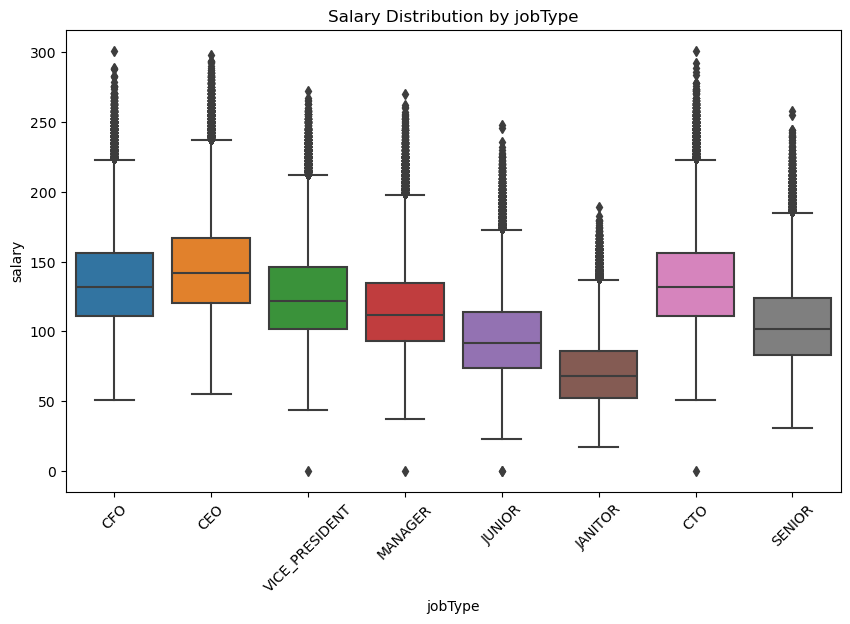

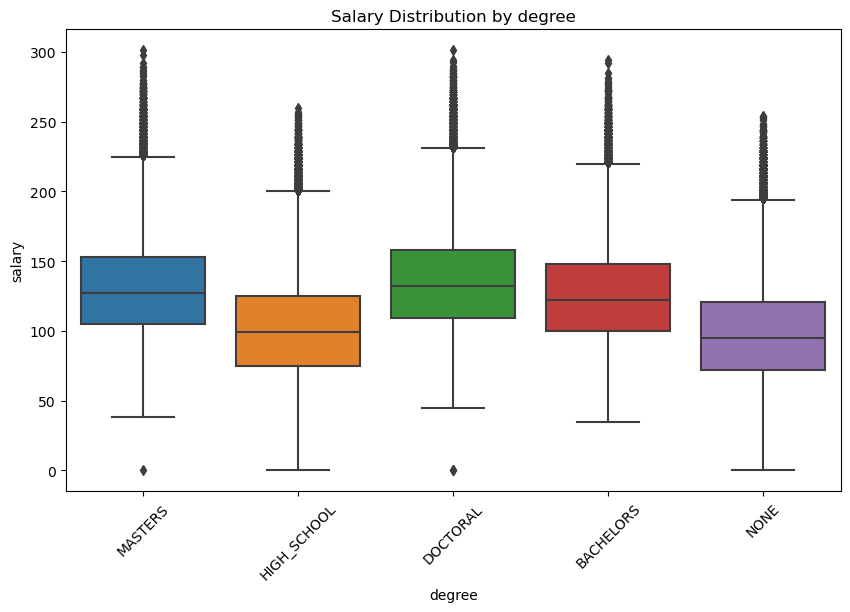

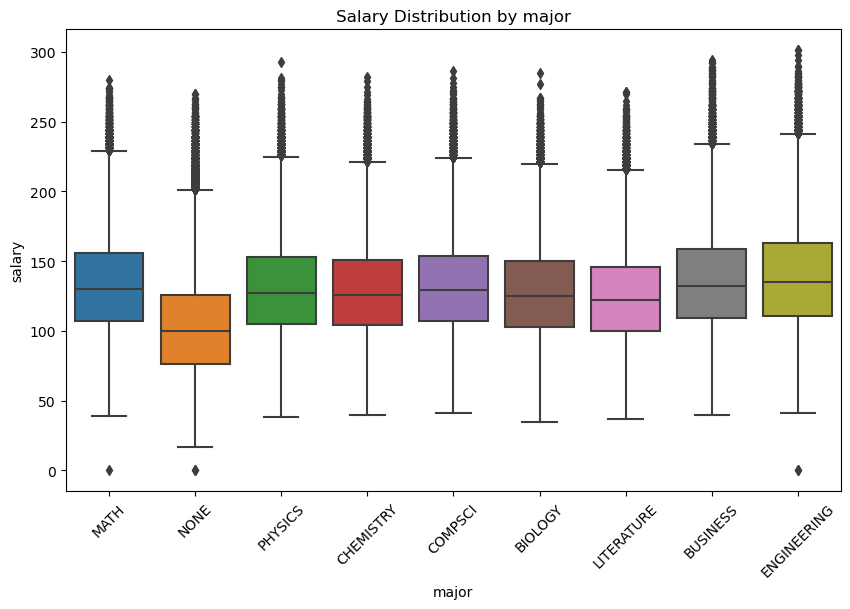

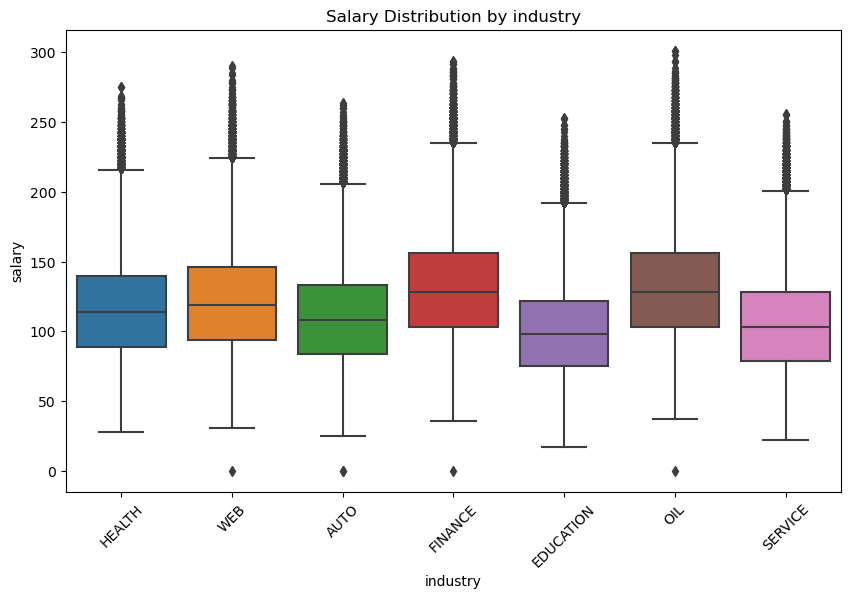

In [23]:
# Boxplot for each categorical variable
for column in ['jobType', 'degree', 'major', 'industry']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='salary', data=combined_data)
    plt.title(f'Salary Distribution by {column}')
    plt.xticks(rotation=45)
    plt.show()
